In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [10]:
curRookieAdv = pd.read_csv("17-18-rookie-adv.csv")
curRookie = pd.read_csv("17-18-rookie.csv")
allRookie = pd.read_csv("all-rookie.csv")
allRookieAdv = pd.read_csv("all-rookie-adv.csv")
nba =   pd.read_csv("nba-new-from-79-80.csv")
nbaper =   pd.read_csv("nba-new-from-79-80-per.csv")
nba

,Unnamed: 0,Player,Age,Tm,Lg,Season,G,GS,MP,PER,...,ORtg,DRtg,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,James Bailey,22.0,SEA,NBA,1979-80,67.0,NaN,726.0,12.3,...,93.0,98.0,-0.4,1.4,1.0,0.063,-4.5,0.9,-3.5,-0.3
1,1,Billy Ray Bates,23.0,POR,NBA,1979-80,16.0,NaN,235.0,24.1,...,112.0,104.0,0.7,0.3,0.9,0.188,5.4,-2.1,3.3,0.3
2,2,Larry Bird,23.0,BOS,NBA,1979-80,82.0,82.0,2955.0,20.5,...,109.0,98.0,5.6,5.6,11.2,0.182,2.7,2.6,5.3,5.4
3,3,Lawrence Boston,23.0,WSB,NBA,1979-80,13.0,NaN,125.0,12.6,...,100.0,105.0,0.1,0.1,0.2,0.075,-2.3,-2.4,-4.7,-0.1
4,4,Dudley Bradley,22.0,IND,NBA,1979-80,82.0,NaN,2027.0,13.5,...,98.0,102.0,0.2,2.9,3.1,0.073,-1.5,2.2,0.7,1.4
5,5,Bill Cartwright,22.0,NYK,NBA,1979-80,82.0,NaN,3150.0,17.9,...,117.0,108.0,7.7,2.1,9.7,0.148,1.5,-0.9,0.6,2.1
6,6,Jeff Cook,23.0,PHO,NBA,1979-80,66.0,NaN,904.0,14.4,...,108.0,102.0,1.1,1.3,2.4,0.126,-0.8,0.6,-0.2,0.4
7,7,Hollis Copeland,24.0,NYK,NBA,1979-80,75.0,NaN,1142.0,11.0,...,101.0,108.0,0.5,0.8,1.2,0.052,-1.7,-0.4,-2.1,0.0
8,8,John Coughran,28.0,GSW,NBA,1979-80,24.0,NaN,160.0,6.0,...,79.0,107.0,-0.4,0.1,-0.3,-0.086,-6.5,-2.6,-9.1,-0.3
9,9,Terry Crosby,23.0,KCK,NBA,1979-80,4.0,NaN,28.0,3.5,...,81.0,109.0,0.0,0.0,0.0,-0.051,-8.3,-4.9,-13.3,-0.1


In [11]:
newRook = curRookie.merge(curRookieAdv, on=['Season','Age','Tm','Lg','Player','G','GS','MP'])
newRook.drop(columns=['Rk_x','Rk_y','Lg'], inplace=True)
newRook['Player'] = newRook['Player'].str.split("\\").str[0]
newRook.fillna(0, inplace=True)
allRook = allRookie.merge(allRookieAdv, on=['Season','Age','Tm','Lg','Player','G','GS','MP'])
allRook.drop(columns=['Rk_x','Rk_y','Lg','Tm'], inplace=True)
allRook['Player'] = allRook['Player'].str.split("\\").str[0]
allRook.fillna(0, inplace=True)
nbadf = nba.merge(nbaper, on=['Season','Age','Unnamed: 0','Lg','Player','G','GS','MP'])
nbadf.drop(columns=['Lg','Unnamed: 0','Tm_x','Tm_y'], inplace=True)
nbadf['Player'] = nbadf['Player'].str.split("\\").str[0]
nbadf.fillna(0, inplace=True)
nbadf = nbadf[nbadf.Player != 0]
nbadf = nbadf[list(allRook.columns.values)]
newRook = newRook[list(allRook.columns.values)]
allRook = allRook.append(newRook)

cols = list(allRook.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Player')) #Remove b from list
cols.pop(cols.index('Season')) #Remove x from list
nbadf = nbadf[['Player','Season'] + cols] #Create new dataframe with columns in the order you want
nbadf.to_csv('All-NBA-per-adv-stats.csv')
nbadf.head()

,Player,Season,Age,G,GS,MP,FG,FGA,2P,2PA,...,ORtg,DRtg,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,James Bailey,1979-80,22.0,67.0,0.0,726.0,6.0,13.4,6.0,13.4,...,93.0,98.0,-0.4,1.4,1.0,0.063,-4.5,0.9,-3.5,-0.3
1,Billy Ray Bates,1979-80,23.0,16.0,0.0,235.0,11.0,22.4,9.8,19.5,...,112.0,104.0,0.7,0.3,0.9,0.188,5.4,-2.1,3.3,0.3
2,Larry Bird,1979-80,23.0,82.0,82.0,2955.0,8.4,17.8,7.7,16.1,...,109.0,98.0,5.6,5.6,11.2,0.182,2.7,2.6,5.3,5.4
3,Lawrence Boston,1979-80,23.0,13.0,0.0,125.0,6.9,15.0,6.9,15.0,...,100.0,105.0,0.1,0.1,0.2,0.075,-2.3,-2.4,-4.7,-0.1
4,Dudley Bradley,1979-80,22.0,82.0,0.0,2027.0,4.9,10.8,4.8,10.7,...,98.0,102.0,0.2,2.9,3.1,0.073,-1.5,2.2,0.7,1.4


In [12]:
# df = nbadf[nbadf.Player.isin(allRook.Player)]
# df = df[df.Player.isin(newRook.Player)]
df = nbadf
# df.drop(columns=['OWS','DWS','WS','WS/48','PER'], inplace=True)

In [13]:
gr = df.sort_values('Season').groupby('Player')
df['YrsInLg'] = gr.cumcount() + 1
df.reset_index(drop=True, inplace=True)
df.to_csv('All-NBA-per-adv-stats.csv')

In [19]:
allRook1 = df[df.YrsInLg == 1].dropna()
train = df[(df.YrsInLg == 1) & (df.Season != '2017-18')]
test = df[(df.YrsInLg ==1) & (df.Season == '2017-18')]

def comparePlayer(player):
    playerdf = allRook1[allRook1.Player == player]
    X = train.iloc[:,2:]
    y = playerdf.iloc[:,2:]
    weights = np.array([0, .6, .7,1,.2,.2,.2,.2,.2,.2,.2,.2,.2,
                    .2,.2,.2,.2,.2,.2, .8,.2,.2,.2,.2,.8,
                   .7,.5,0,.6,.8,.6,.8,.8,.8,.8,1,
                    .8,1,.8,.8,1,1,1,1,1,1,1,1,0])
    weights = np.array([0, 0, 1,1,0,0,0,0,0,0,0,0,0,
                        0,0,0,0,0,0,0,0,0,0,0,0,1,
                       1,1,0,1,1,1,1,1,1,1,1,
                        1,1,1,1,0,0,0,0,1,1,1,1,0])
#     'Age' 'G' 'GS' 'MP' 'FG' 'FGA' '2P' '2PA' '3P' '3PA' 'FT' 'FTA' 'ORB'
#  'DRB' 'TRB' 'AST' 'STL' 'BLK' 'TOV' 'PF' 'PTS' 'FG%' '2P%' '3P%' 'eFG%'
#  'FT%' 'TS%' 'PER' '3PAr' 'FTr' 'ORB%' 'DRB%' 'TRB%' 'AST%' 'STL%' 'BLK%'
#  'TOV%' 'USG%' 'ORtg' 'DRtg' 'OWS' 'DWS' 'WS' 'WS/48' 'OBPM' 'DBPM' 'BPM'
#  'VORP' 'YrsInLg'
    nbrs = NearestNeighbors(n_neighbors=10, metric='wminkowski', p=2, 
                           metric_params={'w': weights})
    nbrs.fit(X)
    neighbs = nbrs.kneighbors(y, 10, return_distance=False)
    comparr = []
    for n in neighbs:
        comparr = (train.iloc[n,0].values)
    complist = list(comparr)
    comps = df[df.Player.isin(complist)]
    comps.drop(columns=['Player', 'Season'], inplace=True)
    
    comps1 = comps[comps.YrsInLg == 1]
    comps2 = comps[comps.YrsInLg == 2]
    compsdiff = comps2.mean() - comps1.mean()
    compsmax = comps2.max() - comps1.max()
    compsmin = comps2.min() - comps1.min()
    compsmax = comps2.sub(comps1, fill_value=0).max()
    compsmin = comps2.sub(comps1, fill_value=0).min()
#     compsRestCareer = comps[comps.YrsInLg >= 2]
#     cargrp = compsRestCareer.groupby(by='Player').agg({'Age':'max'})
#     print(cargrp)



    df1 = df[df.YrsInLg == 1]
    df2 = df[df.YrsInLg == 2]
    dfdiff = df2.mean() - df1.mean()
    
#     , df1.mean(), df2.mean(), dfdiff
# , 'AvgRookieAll','AvgYr2All','DiffAllY2-Y1'
    compdf = pd.concat([y.T,comps1.mean(),comps2.mean() ,compsdiff,compsmax,compsmin, comps2.min(),comps2.max(),comps2.std()], axis=1)
    compdf.columns=['PlayerRookie','AvgRookieComp','AvgYr2Comp','DiffYr2-Y1','compsmaxdiff','compsmindiff','MinComp','MaxComp','StdYr2Comp']
    compdf['ExpYr2'] = compdf.PlayerRookie + compdf['DiffYr2-Y1']
    alpha = 2.015

    compdf['ExpMax'] = compdf.ExpYr2 + (alpha * compdf.StdYr2Comp/np.sqrt(5))
    compdf['ExpMin'] = compdf.ExpYr2 - (alpha * compdf.StdYr2Comp/np.sqrt(5))
    data = compdf[['PlayerRookie','ExpMin','ExpYr2','ExpMax']]
    tempdf = compdf[['PlayerRookie','ExpMin','ExpYr2','ExpMax']]
    
    tempdf[tempdf < 0] = 0
    tempdf.loc['BPM',:] = data.loc['BPM',:].values
    tempdf.loc['VORP',:] = data.loc['VORP',:].values
    
    return tempdf, complist


In [20]:
cdf, clist = comparePlayer('Donovan Mitchell')
# cdf.reset_index(inplace=True)
print(clist)
degfree = 4
ci = (1-.95)/2
alpha = 2.015
# cdf['diffStd'] = cdf.StdYr2Comp - cdf.StdYr1Comp

# cdf['ExpMax'] = cdf.ExpYr2 + (alpha * cdf.StdYr2Comp/np.sqrt(5))
# cdf['ExpMin'] = cdf.ExpYr2 - (alpha * cdf.StdYr2Comp/np.sqrt(5))
# cdf['ExpMax1'] = cdf.ExpYr2 + cdf.compsmaxdiff
# cdf['ExpMin1'] = cdf.ExpYr2 - (alpha * cdf.StdYr2Comp/np.sqrt(5))
# cdf['ExpMax'] = cdf.MaxComp
# cdf['ExpMin'] = cdf.MinComp
data = cdf[['PlayerRookie','ExpMin','ExpYr2','ExpMax']]
# print(data)
data.loc['FG%', '2P%','3P%','eFG%','TS%','FT%', '3PAr', 'FTr'] = data.loc[['FG%', '2P%','3P%','eFG%','TS%','FT%', '3PAr',  'FTr']]*100
data.fillna(0, inplace=True)
# data.drop(index=['Player','Season'], axis=1, inplace=True)
# data[data < 0] = 0
# cdf


ValueError: WMinkowskiDistance dist: size of w does not match

In [17]:
cdf, clist = comparePlayer('Donovan Mitchell')
# data.drop(['Player','Season'], axis=1, inplace=True)
cdf.round()
cdf.reset_index(inplace=True)
cdf.rename(columns={'index':'Stat'}, inplace=True)
cdf.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1

,Stat,PlayerRookie,ExpMin,ExpYr2,ExpMax
0,Age,21.0,21.129420,22.00,22.870580
1,G,79.0,60.713622,73.10,85.486378
2,GS,71.0,45.643643,65.00,84.356357
3,MP,2638.0,2058.760651,2595.20,3131.639349
4,FG,8.1,6.906321,8.37,9.833679


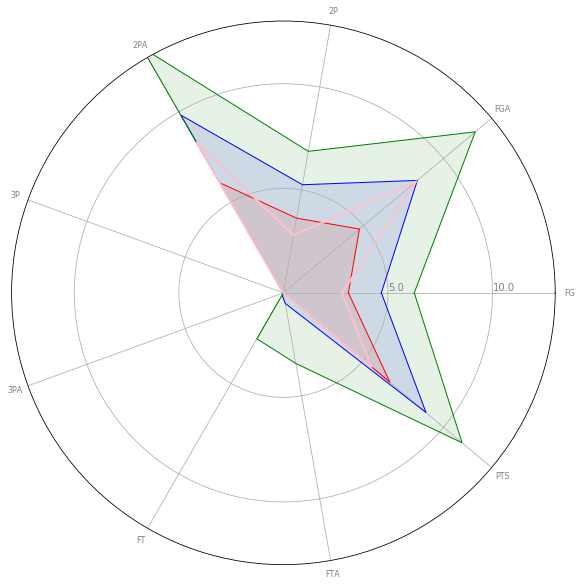

In [18]:
def spidaPlot(categories):
    

    offAvg = data.ExpYr2.loc[categories]
    offMin = data.ExpMin.loc[categories]
    offMax = data.ExpMax.loc[categories]
    offRook = data.PlayerRookie.loc[categories]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=offAvg.tolist()
    values += values[:1]
    minValues=offMin.tolist()
    minValues += minValues[:1]
    maxValues=offMax.tolist()
    maxValues += maxValues[:1]
    rookValues=offRook.tolist()
    rookValues += rookValues[:1]
    
    maxval = max(values + minValues + maxValues + rookValues)
    minval = min(values + minValues + maxValues + rookValues)
    step = 5
    if maxval > 50:
        step = 10
    elif maxval < 10:
        maxval = 10
        step = 2
    mticks = np.arange(step,maxval,step)
    mticksstr = [str(x) for x in mticks]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(mticks, mticksstr, color="grey", size=10)
    plt.ylim(minval,int(maxval))

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color='b')
    ax.fill(angles, values, 'b', alpha=0.1)

    ax.plot(angles, minValues, linewidth=1, linestyle='solid', color='r')
    ax.fill(angles, minValues, 'r', alpha=0.1)

    ax.plot(angles, maxValues, linewidth=1, linestyle='solid', color='g')
    ax.fill(angles, maxValues, 'g', alpha=0.1)
    ax.plot(angles, rookValues, linewidth=2, linestyle='solid', color='pink')
#offensive
spidaPlot(categories = ['FG','FGA','2P','2PA','3P','3PA','FT','FTA','PTS'])

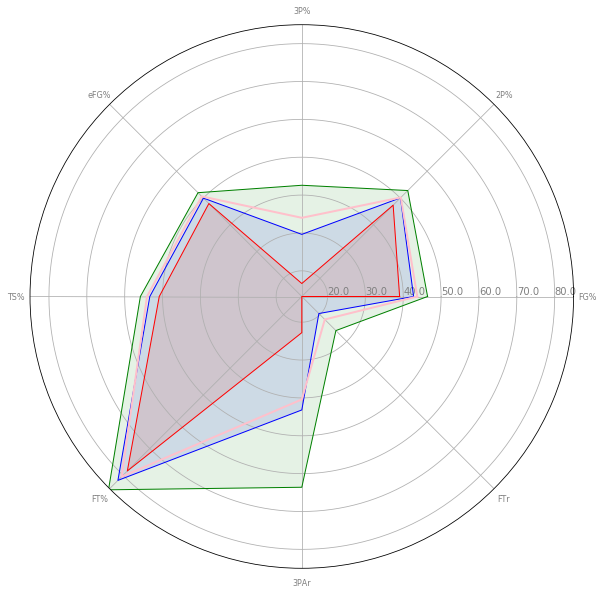

In [52]:
#shooting rates
spidaPlot(categories = ['FG%', '2P%','3P%','eFG%','TS%','FT%', '3PAr', 'FTr'])

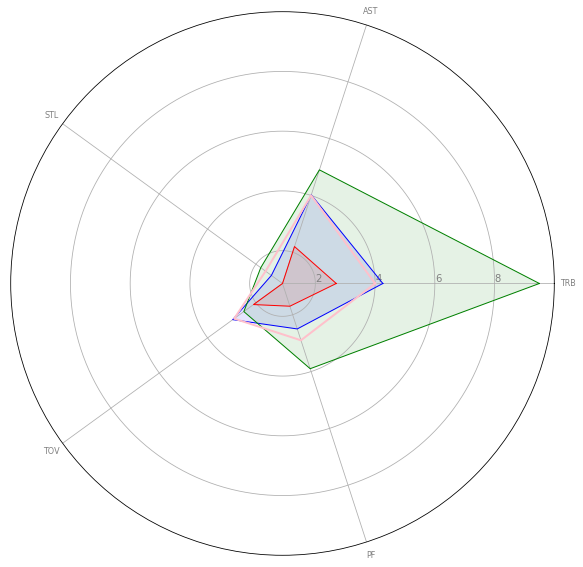

In [10]:
spidaPlot(categories = ['TRB','AST','STL', 'TOV','PF'])

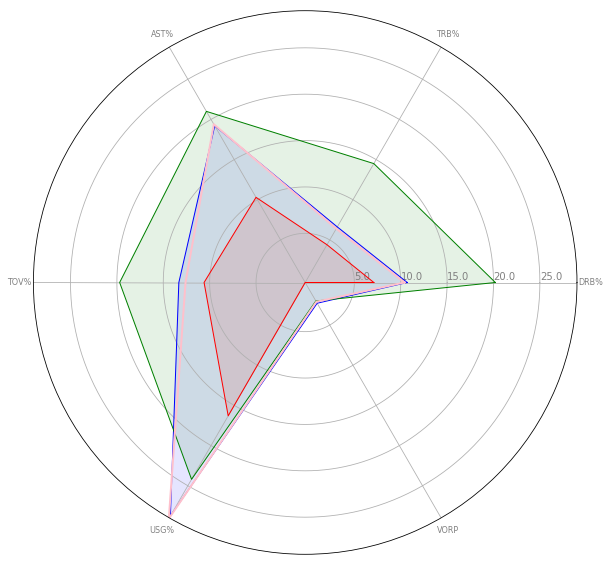

In [11]:
spidaPlot(categories = ['DRB%','TRB%','AST%', 'TOV%','USG%', 'VORP'])

In [12]:

# predYr2 = pd.DataFrame()

# for p in allRook1.Player.unique():
#     cdf, clist = comparePlayer(p)
#     if cdf.isnull().values.any():
#         pass
#     else:
        
#         ex = cdf.ExpYr2
#         ex = ex.append(pd.Series([p], index=['Player']))
#         exdf = ex.to_frame()
#         predYr2 = predYr2.append(exdf.T)
        
    
# predYr2.head()

In [13]:
# predYr2.to_csv('predictionsYear2.csv')

NameError: name 'predYr2' is not defined

In [22]:
predYr2 = pd.read_csv('predictionsYear2.csv')
actYr2 = df[(df.Player.isin(predYr2.Player)) & (df.YrsInLg == 2)]
actYr2.drop(columns=['Season','PER', 'OWS', 'DWS' ,'WS', 'WS/48'], inplace=True)

preds = predYr2[list(actYr2.columns.values)]
resids = actYr2.set_index('Player').subtract(preds.set_index('Player'), fill_value=0)
resids = resids[resids.Age == 0]
resids.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,...,BLK%,TOV%,USG%,ORtg,DRtg,OBPM,DBPM,BPM,VORP,YrsInLg
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,0.0,6.2,58.2,892.6,-0.32,-0.98,-0.30,-0.80,0.00,0.02,...,0.50,-3.28,-2.00,12.6,0.4,1.26,0.94,2.30,1.34,0.0
A.J. English,0.0,3.8,-27.4,-477.6,0.70,2.26,0.96,2.80,-0.22,-0.52,...,-0.14,-2.84,2.78,-3.0,0.2,-1.20,-0.88,-2.12,-1.14,0.0
A.J. Guyton,0.0,11.6,-1.2,88.6,0.76,2.76,-0.30,-0.18,1.18,2.98,...,0.34,0.78,3.44,2.4,2.4,1.60,-0.66,0.90,0.06,0.0
Aaron Brooks,0.0,26.8,23.0,1010.8,-0.30,-0.82,-0.32,-0.04,0.04,-0.90,...,-0.14,1.44,-1.10,3.6,1.2,0.80,0.68,1.46,0.44,0.0
Aaron Gordon,0.0,31.4,25.2,983.4,0.84,1.12,0.78,0.80,0.08,0.22,...,0.36,-3.06,0.84,12.8,-2.2,2.70,1.28,3.92,1.60,0.0


In [34]:
rss = np.sum(resids**2)
rss
rmse = np.sqrt(rss/(resids.shape[0] - (resids.shape[1]-1)))
rmse.sort_values()
avg = actYr2.mean()
percErr = np.abs(rmse/avg)
percErr.sort_values()

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# salMean = y.mean()
# mae = mean_absolute_error(y_test,y_pred)
# mape = mae/salMean
# percError = se/salMean

Age        0.000000
YrsInLg    0.000000
DRtg       0.029560
ORtg       0.101312
TS%        0.116366
eFG%       0.129648
FG%        0.133014
2P%        0.146996
USG%       0.150044
FGA        0.169597
PTS        0.182139
FT%        0.182778
TRB%       0.188878
FG         0.190743
TRB        0.194358
2PA        0.197953
DRB%       0.208904
DRB        0.216204
2P         0.217717
PF         0.227954
TOV%       0.247151
TOV        0.284823
AST        0.288082
AST%       0.291082
FTA        0.326845
ORB%       0.331267
ORB        0.338090
G          0.346058
FTr        0.350015
STL%       0.350065
STL        0.355869
FT         0.360067
3PAr       0.475881
BLK%       0.476711
BLK        0.481039
3PA        0.530850
MP         0.546689
3P         0.697994
3P%        0.829129
BPM        0.963871
OBPM       0.995851
GS         1.041067
DBPM       1.802906
VORP       2.457075
dtype: float64

In [173]:
df1 = df[df.YrsInLg == 1]
df2 = df[df.YrsInLg == 2]
dfdiff = df2.mean() - df1.mean()
dfdiff

Age          0.849526
G            9.374242
GS           9.117813
MP         356.910026
3PAr         0.002680
FTr          0.006967
ORB%        -0.436686
DRB%         0.313772
TRB%        -0.074717
AST%         0.823713
STL%        -0.013208
BLK%         0.017659
TOV%        -0.619905
USG%        -0.291958
ORtg         4.071151
DRtg         0.036816
OBPM         1.015609
DBPM         0.395012
BPM          1.411844
VORP         0.324349
FG           0.149609
FGA         -0.101865
2P           0.108208
2PA         -0.124224
3P           0.039394
3PA          0.020763
FT           0.098012
FTA         -0.004373
ORB         -0.144930
DRB          0.096233
TRB         -0.047487
AST          0.160414
STL         -0.014547
BLK          0.009010
TOV         -0.175097
PF          -0.372840
PTS          0.440333
FG%          0.019090
2P%          0.018850
3P%          0.030655
eFG%         0.020843
FT%          0.043696
TS%          0.022082
YrsInLg      1.000000
dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

y = df[(df.YrsInLg ==2 )& (df.Season != '2017-18') ]
X = df[(df.YrsInLg ==1 )& (df.Season != '2017-18')& (df.Player.isin(y.Player))]

X.drop(columns=['Player','Season'], inplace=True)
y.drop(columns=['Player','Season'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.feature_selection import RFE
knn = NearestNeighbors()

rfe_model = RFE(knn, 4, step=1)
rfe_model = rfe_model.fit(X_train, y_train)

print(rfe_model.support_)
print(rfe_model.ranking_)
 
# evaluate the model on testing set
pred_y = rfe_model.predict(test_x)
# predictions = [round(value) for value in pred_y]
accuracy = accuracy_score(test_y, predictions)
print("Test Accuracy: %.2f%%" % (accuracy*100.0))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


ValueError: bad input shape (1325, 49)

In [60]:
vorp = allRook1.sort_values(by='3P%',ascending=False)
vorp.reset_index(inplace=True)
vorp[vorp.Player == 'Donovan Mitchell']['eFG%']


488    0.506
Name: eFG%, dtype: float64

In [116]:
from scipy import stats
ranks = []
cols = []
spida = allRook1[allRook1.Player == 'Donovan Mitchell']
spida.drop(labels=['Player','Season'],axis=1, inplace=True)
for i in spida.columns.values:
    
    stat = spida[i].values
    
    rank = stats.percentileofscore(allRook1[i],stat)
    ranks.append(rank)

dfrank = pd.DataFrame(data=ranks,index=spida.columns.values)
rnks = dfrank[0].sort_values(ascending=False)

rdf = rnks.to_frame('Percentile Rank')
rdf = rdf.round(1)
# rdf = rdf.T
# # rdf.reset_index( inplace=True)
# rdf.iloc[:,:20].head()
rdf.head(25)
# percentile = stats.percentileofscore(allRook1['3PAr'],0.404 )
# percentile

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Percentile Rank
DWS,99.1
3P,97.7
3PA,97.7
VORP,97.6
MP,97.2
PTS,97.0
WS,96.8
GS,96.1
FG,95.5
USG%,95.4


In [63]:
stats.percentileofscore(allRook1['3P%'],0.34 )

82.06642066420665

In [64]:
stats.percentileofscore(allRook1['USG%'],29.1 )

95.4059040590406

In [65]:
stats.percentileofscore(allRook1['BPM'],1.1)

93.00738007380073

In [66]:
stats.percentileofscore(allRook1['VORP'],2.1)

97.60147601476015

In [67]:
stats.percentileofscore(allRook1['STL%'],2.2)

76.86346863468636

In [68]:
stats.percentileofscore(allRook1['eFG%'],0.506)

79.8339483394834